In [23]:
%cd
%cd seaborn-data/
# %ls

C:\Users\AMOS OSHIYOYE
C:\Users\AMOS OSHIYOYE\seaborn-data


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
titanic=pd.read_csv('titanic.csv')

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
 15  sex_array    891 non-null    int64  
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [11]:
titanic.loc[(titanic['sex']=='male')&(titanic['survived']==0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [12]:
age_1=pd.qcut(titanic['age'],5)
titanic.pivot_table(aggfunc={'survived':'mean','fare':['min','max']},index=age_1,columns='sex')

fare                          survived          
                    max              min             mean          
sex              female      male female   male    female      male
age                                                                
(0.419, 19.0]  262.3750  263.0000  6.750  0.000  0.706667  0.292135
(19.0, 25.0]   263.0000  247.5208  7.250  0.000  0.723404  0.122222
(25.0, 31.8]   211.3375  211.5000  7.750  6.975  0.727273  0.216867
(31.8, 41.0]   512.3292  512.3292  9.475  0.000  0.843137  0.215054
(41.0, 80.0]   247.5208  263.0000  7.750  0.000  0.795455  0.183673

In [13]:
titanic.loc[(titanic['survived']==1) & (titanic['age']<18)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
22,1,3,female,15.00,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
39,1,3,female,14.00,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,1,3,female,15.00,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
853,1,1,female,16.00,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
869,1,3,male,4.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


In [14]:
for a in range(len(titanic.columns)):
#     print(titanic.columns[a])
    print(f'{titanic.columns[a]}: \t{titanic[titanic.columns[a]].unique()}')

survived: 	[0 1]
pclass: 	[3 1 2]
sex: 	['male' 'female']
age: 	[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp: 	[1 0 3 4 2 5 8]
parch: 	[0 1 2 5 3 4 6]
fare: 	[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8


In [15]:
age = pd.qcut(titanic['age'],6)
titanic.pivot_table('alone',[age, 'survived'],'sex')

sex                       female      male
age           survived                    
(0.419, 18.0] 0         0.181818  0.404255
              1         0.239130  0.083333
(18.0, 23.0]  0         0.625000  0.878788
              1         0.520000  0.625000
(23.0, 28.0]  0         0.400000  0.704918
              1         0.448276  0.750000
(28.0, 34.0]  0         0.375000  0.716667
              1         0.531250  0.875000
(34.0, 44.0]  0         0.222222  0.639344
              1         0.416667  0.666667
(44.0, 80.0]  0         0.428571  0.784615
              1         0.344828  0.571429

In [16]:
survived_tag={'female':0,'male':1}
sex_arr=[]
for a in titanic['sex']:
    sex_arr.append(survived_tag[a])

In [17]:
titanic['sex_array']=sex_arr

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
c:\users\amos oshiyoye\appdata\local\programs\python\python38\lib\site-packages\matplotlib\colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
c:\users\amos oshiyoye\appdata\local\programs\python\python38\lib\site-packages\matplotlib\ticker.py:548: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


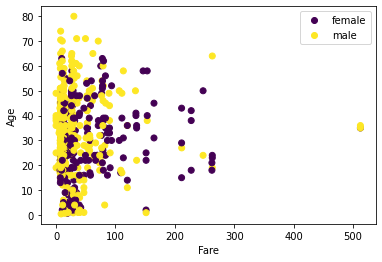

In [18]:
scatter=plt.scatter(x=titanic['fare'],y=titanic['age'], c=sex_arr)
plt.legend(handles=scatter.legend_elements()[0], labels=survived_tag.keys())
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

In [19]:
import math

In [20]:
paid_fares=(round(titanic['fare']//1,-2))
paid_fares=paid_fares.astype('str')+'s'
paid_fares.name='Paid_Fares'
titanic.groupby(['sex',paid_fares])['survived'].count().unstack().fillna(0)

Paid_Fares,0.0s,100.0s,200.0s,300.0s,500.0s
sex,,,,,
female,227,68,14,4,1
male,505,62,6,2,2


In [21]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'sex_array'],
      dtype='object')

In [22]:
titanic.loc[(titanic['sex']=='male') & (titanic['adult_male']!=True) &(titanic['age']<=18)&(titanic['alive']=='yes')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_array
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False,1
125,1,3,male,12.00,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False,1
165,1,3,male,9.00,0,2,20.5250,S,Third,child,False,NaN,Southampton,yes,False,1
183,1,2,male,1.00,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False,1
193,1,2,male,3.00,1,1,26.0000,S,Second,child,False,F,Southampton,yes,False,1
261,1,3,male,3.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False,1
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False,1
340,1,2,male,2.00,1,1,26.0000,S,Second,child,False,F,Southampton,yes,False,1
348,1,3,male,3.00,1,1,15.9000,S,Third,child,False,NaN,Southampton,yes,False,1
407,1,2,male,3.00,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False,1
